In [2]:
# importing python libraries to perform tasks.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading csv file from device.

df = pd.read_csv('/content/BlackFridaySales.csv')

# Top 5 rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Total rows and Columns

df.shape

(550068, 12)

In [5]:
# Checking datatypes of all columns and null columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# Checking null values

df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [7]:
df.Product_Category_2.fillna('0', inplace=True)
df.Product_Category_3.fillna('0', inplace=True)


<ipython-input-7-be96641b2c6c>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.Product_Category_2.fillna('0', inplace=True)
<ipython-input-7-be96641b2c6c>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.Product_Category_3.fillna('0', inplace=True)


In [8]:
# Checking null value again

df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [9]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int64 
 10  Product_Category_3          550068 non-null  int64 
 11  Purchase                    550068 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 50.4+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


**Purchase Behavior Analysis:**

1. Analyze the distribution of the Purchase amount. Are there specific groups (e.g., age groups, gender, or city categories) that tend to spend more?

In [12]:
gender_distribution = df.groupby('Gender')['Purchase'].sum()
gender_distribution

,Purchase
Gender,
F,1186232642
M,3909580100


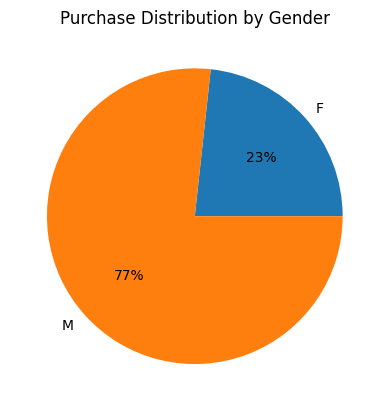

In [13]:
gender_distribution.plot(kind = 'pie',label='Purchase', autopct='%.0f%%')
plt.title('Purchase Distribution by Gender')
plt.ylabel('')
plt.show()

In [14]:
city_distribution = df.groupby('City_Category')['Purchase'].sum()
city_distribution

,Purchase
City_Category,
A,1316471661
B,2115533605
C,1663807476


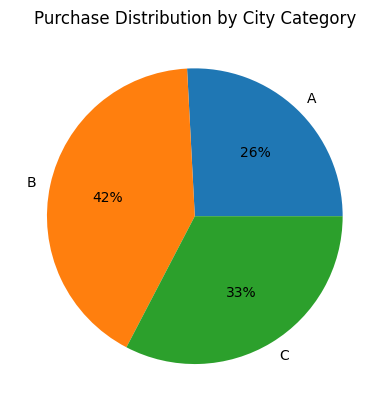

In [15]:
city_distribution.plot(kind = 'pie',label='Purchase', autopct='%.0f%%')
plt.title('Purchase Distribution by City Category')
plt.ylabel('')
plt.show()

In [16]:
grp_by_age = df.groupby('Age')['Purchase'].sum().reset_index()
grp_by_age

,Age,Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


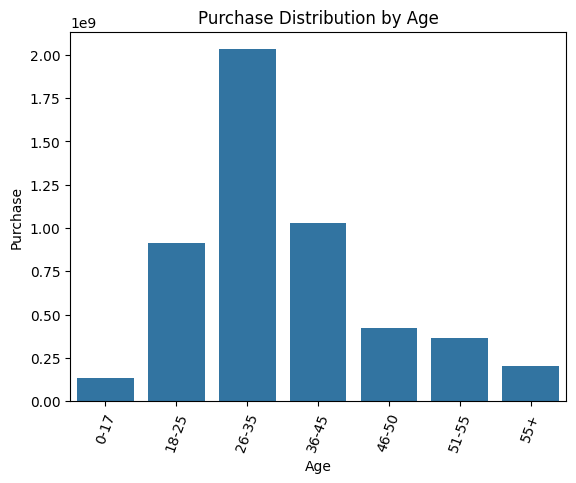

In [17]:
# grp_by_age.plot(kind = 'bar',x='Age',y='Purchase',color='#ec33ff')
x = sns.barplot(x='Age',y='Purchase',data = grp_by_age)
plt.title('Purchase Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.xticks(rotation=70)
plt.show()

After analysing this case,

1. Purchase amount of male are higher then the female.
2. Purchase distribution of city category B is higher followed by city C and A.
3. People of age group 26-35 having higher purchase rate.


**Product Category Insights:**

2. Explore the distribution of purchases across different Product_Category_1, Product_Category_2, and Product_Category_3. Which product categories are the most popular?


In [18]:
sum_by_pro_1 = df.groupby('Product_Category_1')['Purchase'].sum()
sum_by_pro_1

,Purchase
Product_Category_1,
1,1910013754
2,268516186
3,204084713
4,27380488
5,941835229
6,324150302
7,60896731
8,854318799
9,6370324


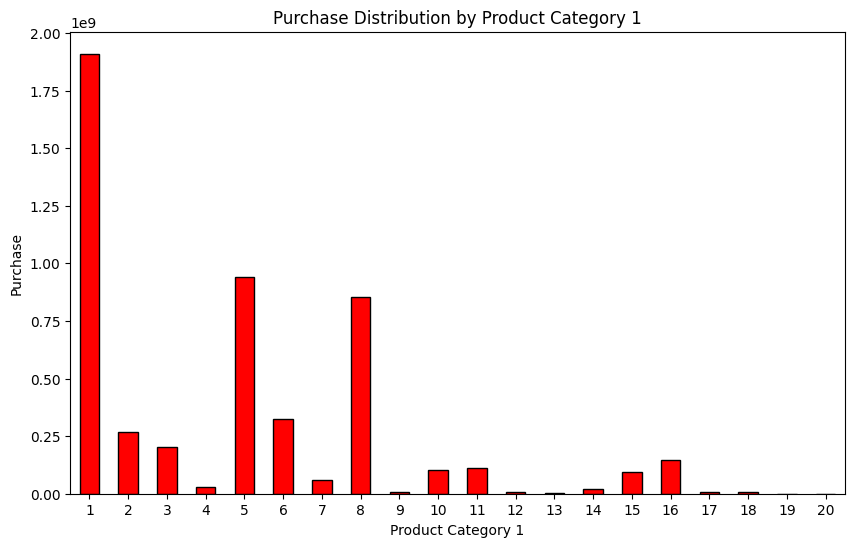

In [19]:
plt.figure(figsize=(10,6))
sum_by_pro_1.plot(kind='bar',color='red',edgecolor='black')
plt.title('Purchase Distribution by Product Category 1')
plt.xlabel('Product Category 1')
plt.ylabel('Purchase')
plt.xticks(rotation=00)
plt.show()

#### 1 in the Product_category_1 has been purchased more followed by 5

In [20]:
grp_pro_2 = df.groupby('Product_Category_2')['Purchase'].sum().reset_index()
grp_pro_2

,Product_Category_2,Purchase
0,0,1305531230
1,2,670303864
2,3,32402777
3,4,262295485
4,5,236844899
5,6,189417477
6,7,4309812
7,8,658392656
8,9,41428000
9,10,47619084


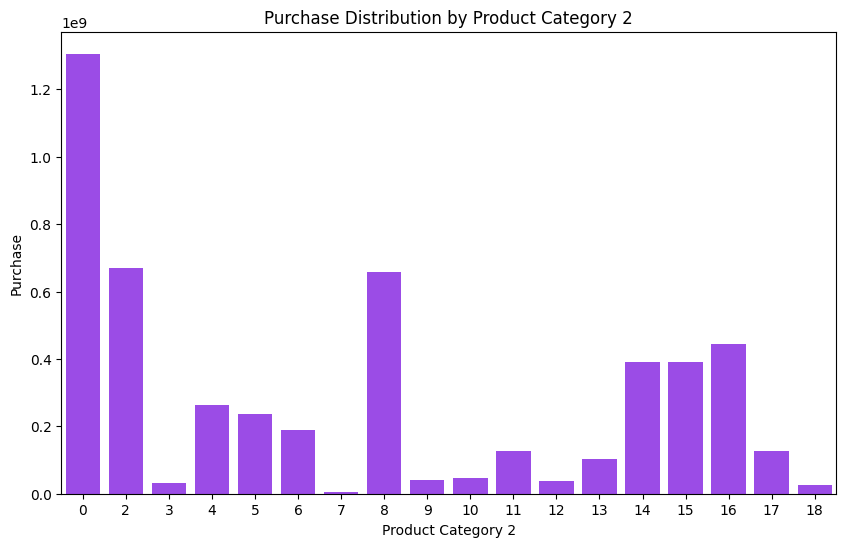

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category_2',y='Purchase',data=grp_pro_2,color='#9c33ff')
plt.title('Purchase Distribution by Product Category 2')
plt.xlabel('Product Category 2')
plt.ylabel('Purchase')
plt.show()

#### 2 in the Product_category_2 has been purchased more followed by 8 where excluding 0 from product_category while doing insights.

In [22]:
grp_pro_3 = df.groupby('Product_Category_3')['Purchase'].sum().reset_index()
grp_pro_3

,Product_Category_3,Purchase
0,0,3150994343
1,3,8545034
2,4,18364475
3,5,201858094
4,6,64520181
5,8,163619031
6,9,120788622
7,10,23311034
8,11,21825045
9,12,80583631


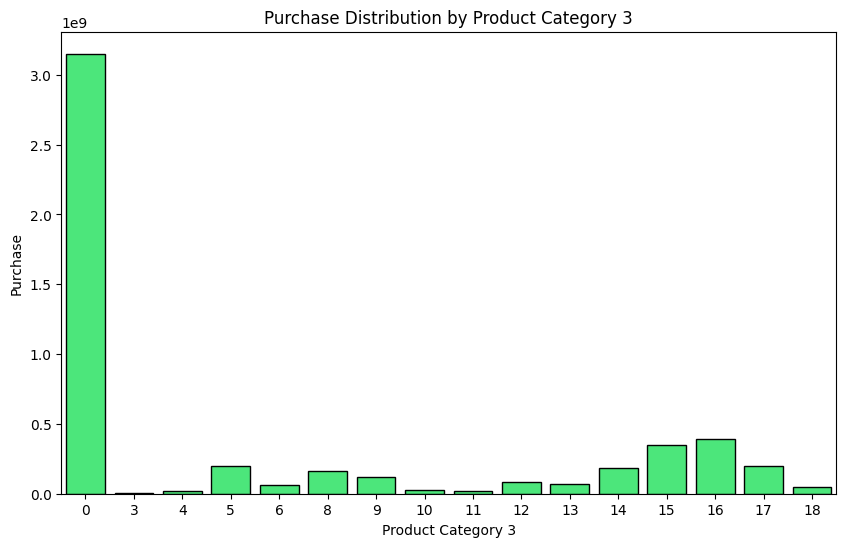

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category_3',y='Purchase',data=grp_pro_3,color='#33ff71',edgecolor='black')
plt.title('Purchase Distribution by Product Category 3')
plt.xlabel('Product Category 3')
plt.ylabel('Purchase')
plt.show()

#### 16 in the Product_category_3 has been purchased more followed by 15 where excluding 0 from product_category while doing insights.

**Customer Demographics:**

3. Analyze the distribution of customers based on Age, Gender, and City_Category. Which demographic group is most active during the Black Friday sales?

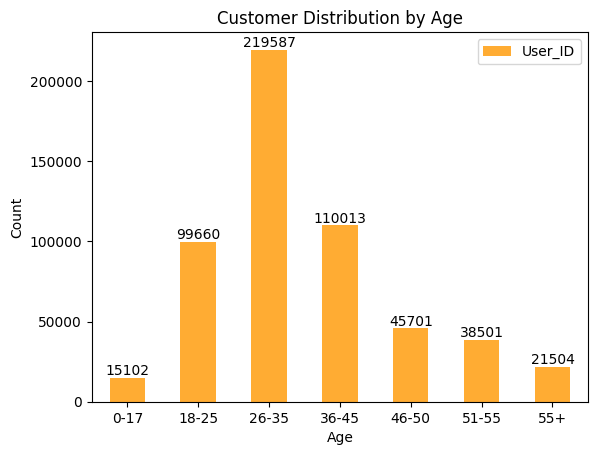

In [24]:
x = df.groupby('Age')['User_ID'].count().reset_index().plot(kind='bar',x='Age',y='User_ID',color='#ffac33')
plt.title('Customer Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
for i in x.containers:
  x.bar_label(i)
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Count')

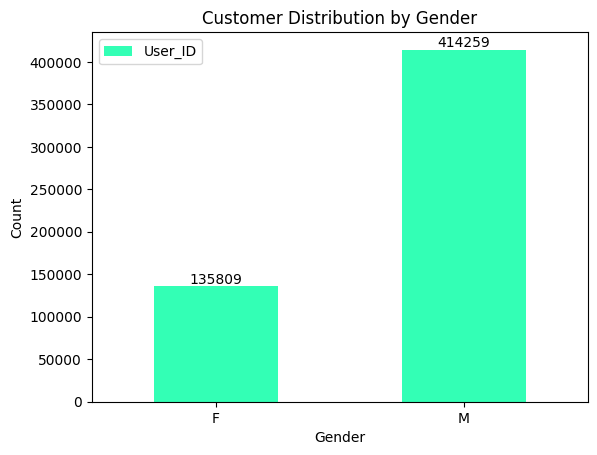

In [25]:
xz = df.groupby('Gender')['User_ID'].count().reset_index().plot(kind='bar',x='Gender',y='User_ID',color='#33ffb5')
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
for i in xz.containers:
  xz.bar_label(i)
plt.xticks(rotation=0)
plt.ylabel('Count')

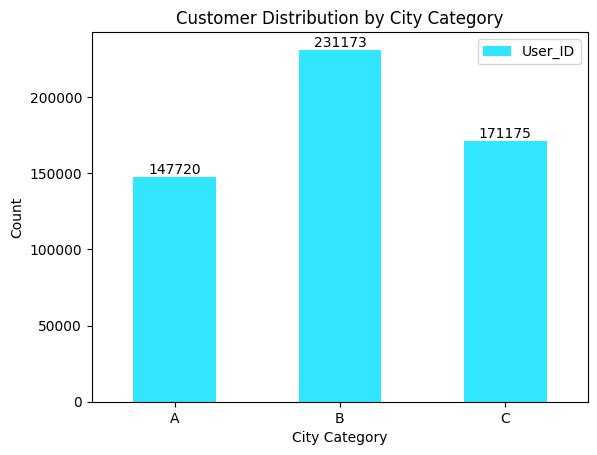

In [26]:
xz = df.groupby('City_Category')['User_ID'].count().reset_index().plot(kind='bar',x='City_Category',y='User_ID',color='#33e6ff')
plt.title('Customer Distribution by City Category')
plt.xlabel('City Category')
plt.ylabel('Count')
for i in xz.containers:
  xz.bar_label(i)
plt.xticks(rotation=0)
plt.show()

After analysing these cases,

1. Age group of 26-35 Customer are maximum.
2. Male customers are having maximum number.
3. City B is having highest count.

**Impact of Occupation:**

4. Investigate the relationship between Occupation and Purchase. Are certain occupations associated with higher purchase amounts?

In [27]:
occ_grp = df.groupby('Occupation')['Purchase'].sum().reset_index()
occ_grp

,Occupation,Purchase
0,0,635406958
1,1,424614144
2,2,238028583
3,3,162002168
4,4,666244484
5,5,113649759
6,6,188416784
7,7,557371587
8,8,14737388
9,9,54340046


<Figure size 1000x600 with 0 Axes>

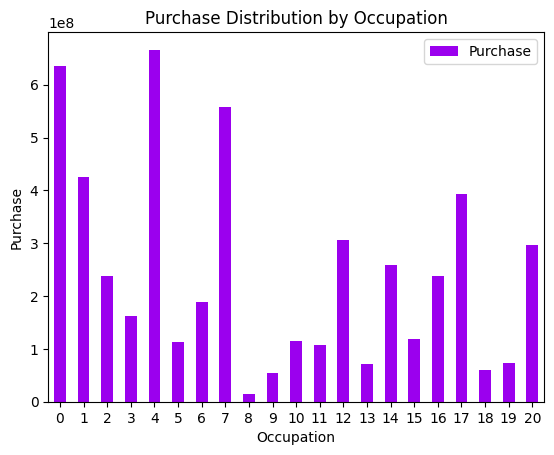

In [28]:
plt.figure(figsize=(10,6))
occ_grp.plot(kind='bar',x='Occupation',y='Purchase',color='#9b00ee')
plt.title('Purchase Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.show()

####Observing that occupation 4 is having highest sum of purchase followed by occupation 0.



**City-wise Purchase Behavior:**

5. Explore the purchase behavior across different City_Category. Are there significant differences in spending patterns among the cities?

In [29]:
city_wise_pur = df.groupby('City_Category')['Purchase'].sum().reset_index()
city_wise_pur

,City_Category,Purchase
0,A,1316471661
1,B,2115533605
2,C,1663807476


<ipython-input-30-f462c6bd150d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City_Category', y='Purchase',data=city_wise_pur, palette='viridis')


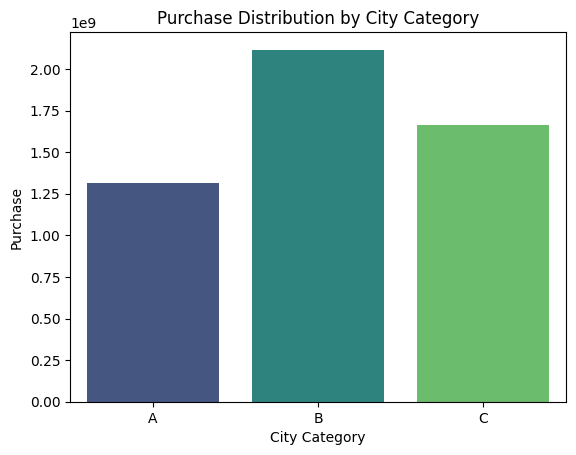

In [30]:
sns.barplot(x='City_Category', y='Purchase',data=city_wise_pur, palette='viridis')
plt.title('Purchase Distribution by City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase')
plt.show()

After analysing city category observe that City B has highest purchase amount followed by city C.

**Stay in Current City:**

6. Analyze how the duration of stay in the current city (Stay_In_Current_City_Years) affects purchase behavior. Do longer stays correlate with higher spending?

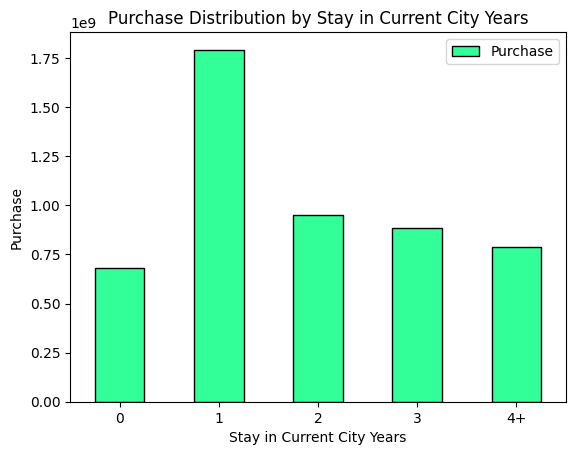

In [31]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index().plot(kind='bar',x='Stay_In_Current_City_Years',y='Purchase',color='#33ff99',edgecolor='black')
plt.title('Purchase Distribution by Stay in Current City Years')
plt.xlabel('Stay in Current City Years')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.show()

By analyzing the duration of stay in the current city, found that customer who have stayed at least 1 year have more purchasing.  
No, longer stays don't correlate with higher spending.

**Correlation Between Product Categories:**

7. Examine if there's any correlation between the three product categories (Product_Category_1, Product_Category_2, and Product_Category_3). Do customers who buy from one category tend to buy from another?

In [32]:
product_categories = df[['Product_Category_1','Product_Category_2','Product_Category_3']]

In [33]:
product_categories.corr()

,Product_Category_1,Product_Category_2,Product_Category_3
Product_Category_1,1.000000,-0.067877,-0.385534
Product_Category_2,-0.067877,1.000000,0.094750
Product_Category_3,-0.385534,0.094750,1.000000


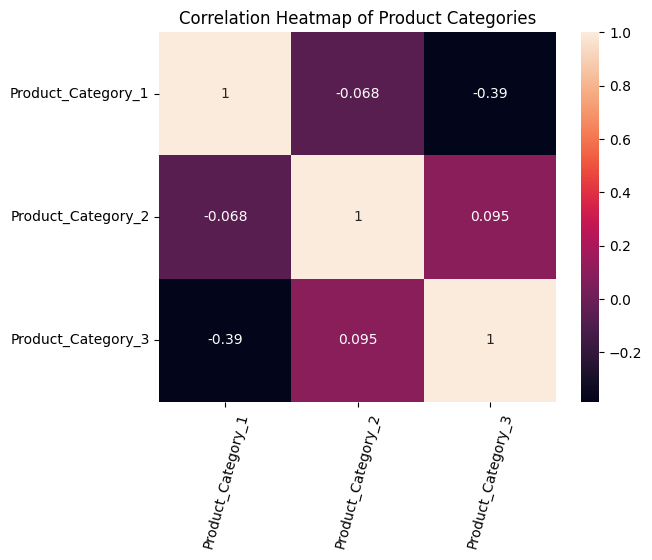

In [34]:
sns.heatmap(product_categories.corr(),annot=True)
plt.title('Correlation Heatmap of Product Categories')
plt.xticks(rotation=75)
plt.show()

A value close to 1 indicates a strong positive correlation there are customers who buy from one category tend to buy from another.

**Outlier Analysis:**

8. Identify any outliers in the Purchase data. How do these outliers affect the overall analysis?

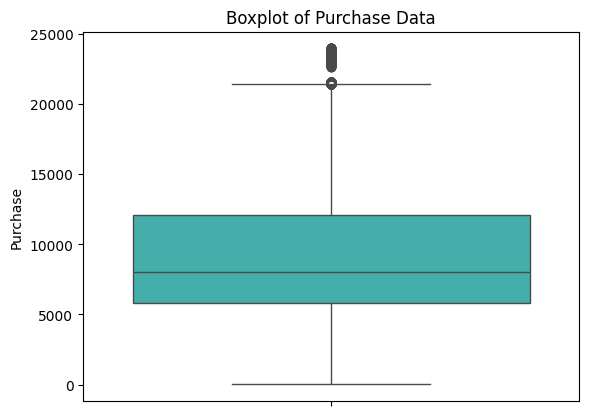

In [40]:
sns.boxplot(df['Purchase'],color='#33bfbb')
plt.title('Boxplot of Purchase Data')
plt.ylabel('Purchase')
plt.show()

Box Plot helps visually identify outliers that lie outside the typical range of the data.

Mean outliers heavily influence the mean (average) by pulling it toward the extreme values

**Gender-wise Product Preferences:**

9. Investigate if there are significant differences in product category preferences between male and female customers.


In [44]:
grp_gender_1 = df.groupby('Gender')['Product_Category_1'].value_counts()
grp_gender_1

Gender  Product_Category_1
F       5                      41961
        8                      33558
        1                      24831
        3                       6006
        2                       5658
        11                      4739
        6                       4559
        4                       3639
        16                      2402
        12                      1532
        13                      1462
        10                      1162
        15                      1046
        7                        943
        20                       723
        14                       623
        19                       451
        18                       382
        9                         70
        17                        62
M       1                     115547
        5                     108972
        8                      80367
        11                     19548
        2                      18206
        6                      15907
        3                      14207
        4                       8114
        16                      7426
        15                      5244
        13                      4087
        10                      3963
        7                       2778
        18                      2743
        12                      2415
        20                      1827
        19                      1152
        14                       900
        17                       516
        9                        340
Name: count, dtype: int64

<Figure size 1800x600 with 0 Axes>

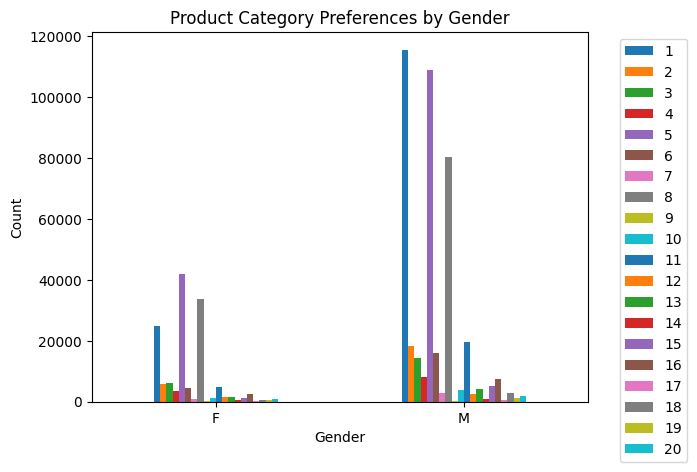

In [45]:
plt.figure(figsize=(18,6))
grp_gender_1.unstack().plot(kind='bar',label='Product_Category_1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Product Category Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [46]:
grp_prod_2 = df.groupby('Gender')['Product_Category_2'].value_counts()
grp_prod_2

Gender  Product_Category_2
F       0                      44279
        14                     19693
        8                      16529
        16                      9496
        2                       9199
        4                       7619
        15                      6432
        5                       6155
        6                       3291
        11                      2754
        13                      2669
        17                      2484
        12                      1744
        9                       1497
        10                       736
        3                        617
        18                       478
        7                        137
M       0                     129359
        8                      47559
        2                      40018
        14                     35415
        16                     33759
        15                     31423
        5                      20080
        4                      18058
        6                      13175
        11                     11380
        17                     10836
        13                      7862
        9                       4196
        12                      3784
        10                      2307
        18                      2292
        3                       2267
        7                        489
Name: count, dtype: int64

<Figure size 1800x600 with 0 Axes>

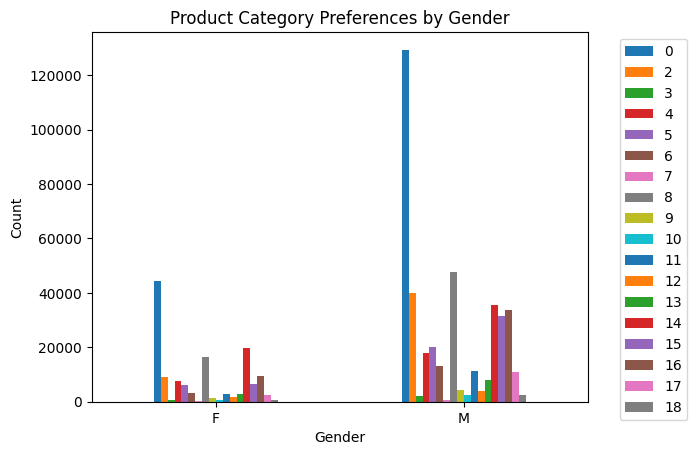

In [47]:
plt.figure(figsize=(18,6))
grp_prod_2.unstack().plot(kind='bar',label='Product_Category_1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Product Category Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [48]:
grp_prod_3 = df.groupby('Gender')['Product_Category_3'].value_counts()
grp_prod_3

Gender  Product_Category_3
F       0                      98215
        16                      6774
        14                      5623
        15                      4610
        5                       4297
        17                      3738
        8                       2941
        12                      2722
        9                       2676
        13                      1229
        18                       880
        6                        828
        4                        433
        10                       414
        11                       334
        3                         95
M       0                     285032
        16                     25862
        15                     23403
        17                     12964
        14                     12805
        5                      12361
        8                       9621
        9                       8903
        12                      6524
        13                      4230
        6                       4062
        18                      3749
        11                      1471
        4                       1442
        10                      1312
        3                        518
Name: count, dtype: int64

<Figure size 1800x600 with 0 Axes>

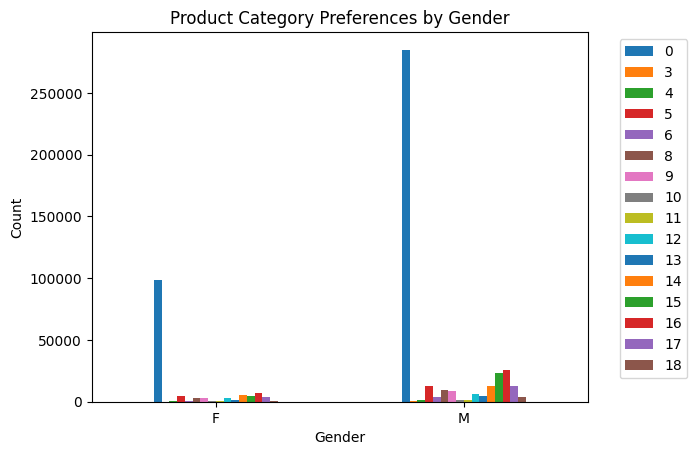

In [49]:
plt.figure(figsize=(18,6))
grp_prod_3.unstack().plot(kind='bar',label='Product_Category_1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Product Category Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Advanced Insights:**

10. Use advanced visualizations like heatmaps or pair plots to discover any hidden patterns or relationships within the data.


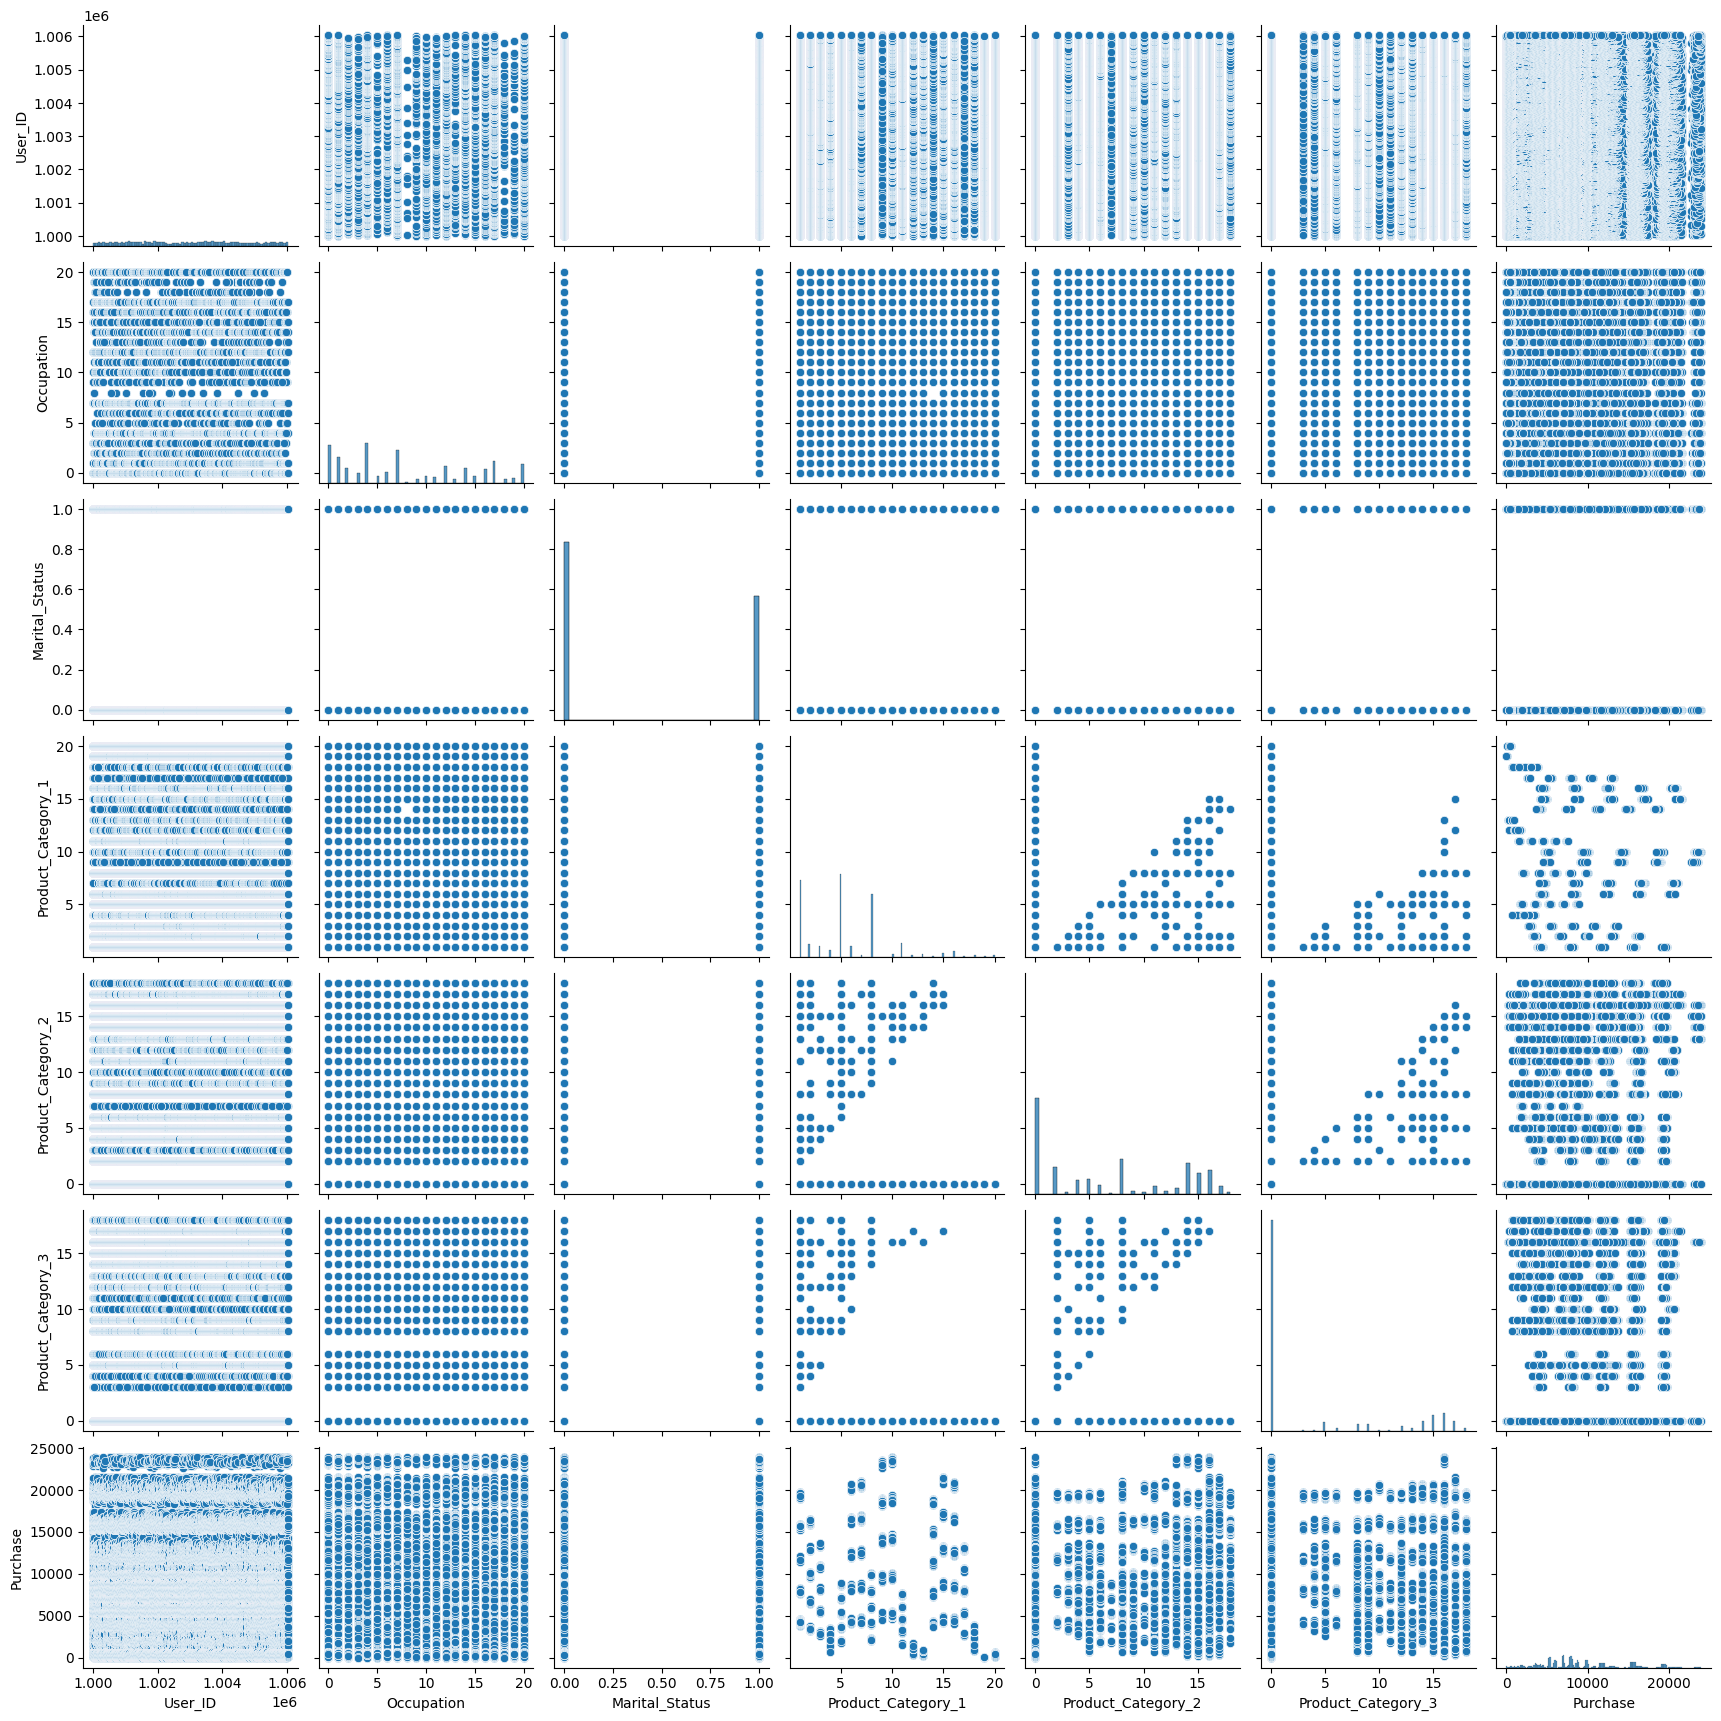

In [42]:
sns.pairplot(df)
plt.show()

**Insights and Conclusion:**

1. After analysing this case,

  - Purchase amount of male are higher then the female.
  - Purchase distribution of city category B is higher followed by city C and A.
  - People of age group 26-35 having higher purchase rate.


2. - 16 in the Product_category_3 has been purchased more followed by 15     where    
  excluding 0 from product_category while doing insights.

  - 1 in the Product_category_1 has been purchased more followed by 5

3. After analysing these cases,

  - Age group of 26-35 Customer are maximum.
  - Male customers are having maximum number.
  - City B is having highest count.

4. Observing that occupation 4 is having highest sum of purchase followed by occupation 0.
5. After analysing city category observe that City B has highest purchase amount followed by city C.
6. By analyzing the duration of stay in the current city, found that customer who have stayed at least 1 year have more purchasing.
No, longer stays don't correlate with higher spending.
7. A value close to 1 indicates a strong positive correlation there are customers who buy from one category tend to buy from another.
8. Box Plot helps visually identify outliers that lie outside the typical range of the data.

  Mean outliers heavily influence the mean (average) by pulling it toward the extreme values.
